# Problem Statement:
- Create a model that may be used to categorise the various iris flower species.


# Dataset:
- Each of the three Iris species—Iris setosa, Iris virginica, and Iris versicolor—has 50 samples in the data set. From each sample, the length and width of the sepals and petals, both in centimetres, were measured. Fisher created a linear discriminant model to separate the species based on the combination of these four features. Columns:
- 1. Id
- 2. sepal_length
- 3. sepal_width
- 4. petal_length
- 5. petalwidth
- 6. species - (Iris Setosa, Iris Versicolour, Iris Virginica)

# Import Libraries

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
#import dataset
df=pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.shape

(150, 5)

- The Iris data set contains 150 instances, with 4 features and 1 target variable. These features are measured in centimeters having a float data type and they don't have any null values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='count'>

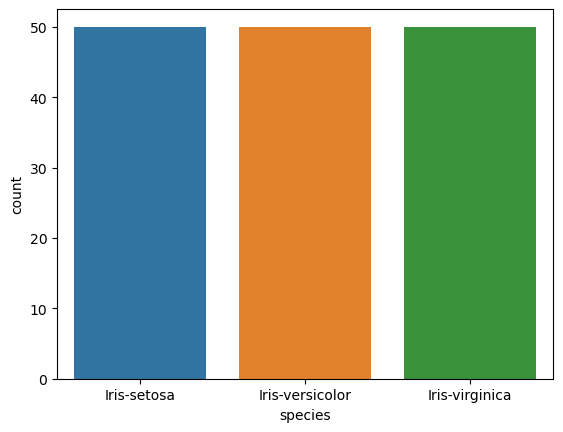

In [11]:
#Countplot to get the number of instances for each Species
sns.countplot(x='species', data=df)


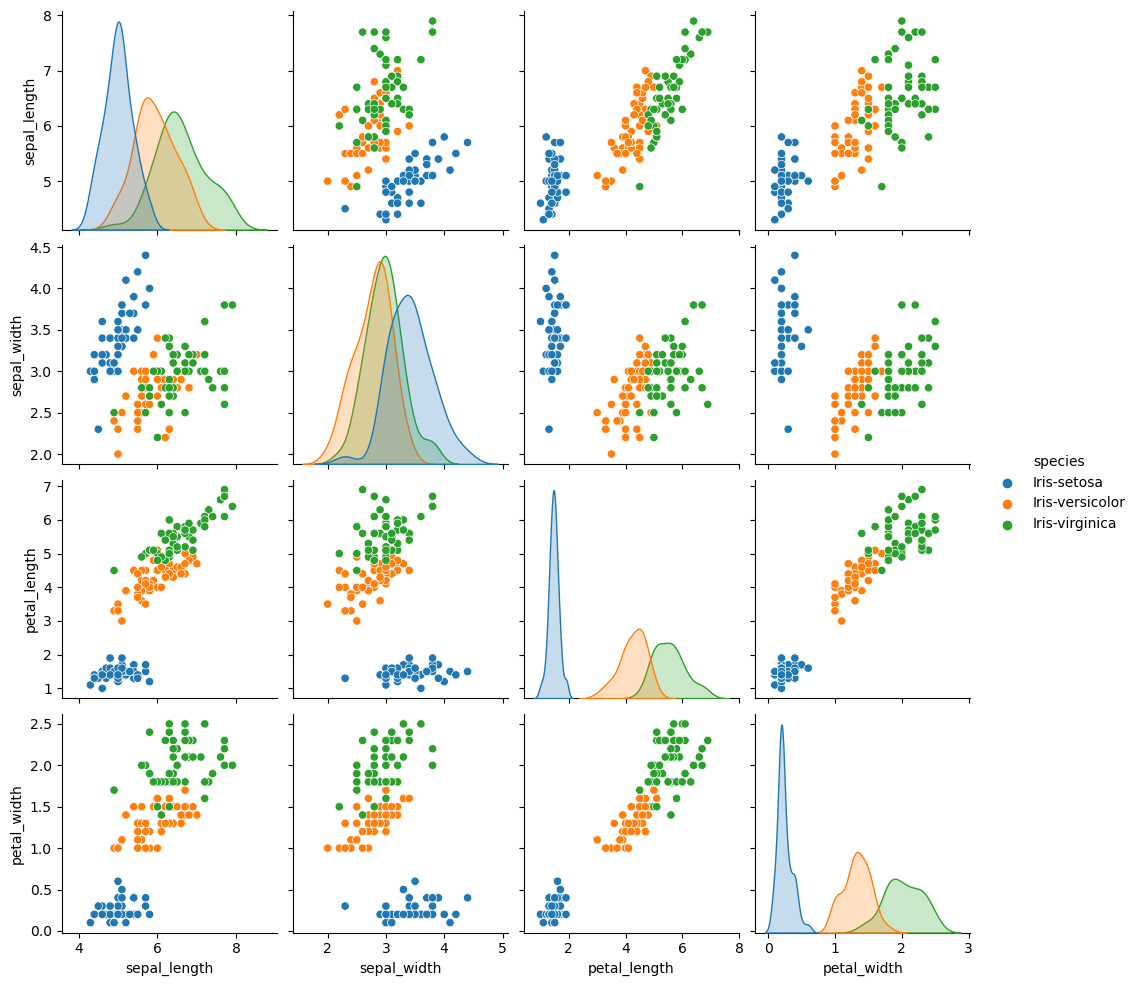

In [12]:
#Pairplot to get the correlation among the 4 features.
sns.pairplot(df, hue='species')
plt.show()


<AxesSubplot:>

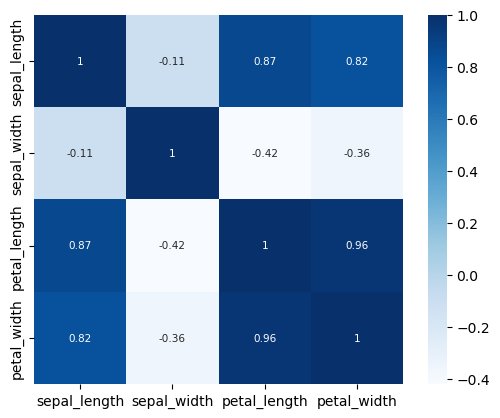

In [13]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7.5}, cmap='Blues', square=True)

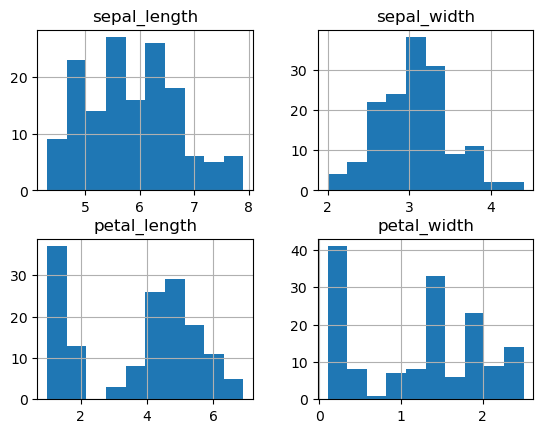

In [14]:
#histograms
df.hist()
plt.show()

# Minmax Scaler

In [9]:
#As the range of the features are different so we will use MinMax Scaler to ensure the fetures are on a same scale.
X = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scale = MinMaxScaler()
scaledX = scale.fit_transform(df[X])
x = scaledX

# Label Encoding

In [10]:
#Converting categorical column to numerical using LabelEncoder, LabelEncoder will assign an integer to each species.
encoder = LabelEncoder()
y = encoder.fit_transform(df['species'])

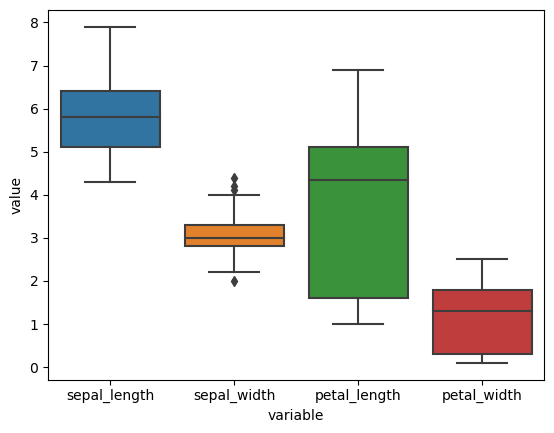

In [15]:
#Boxplot to find the outliers in our dataset
#The function pd.melt() will unpivots a DataFrame from wide format to long format
sns.boxplot(x="variable", y="value", data=pd.melt(df[X]))
plt.show()

In [16]:
df['species']=pd.Categorical(df['species']).codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Spliting the Data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [18]:
df1=df.copy()

In [19]:
# Copy all the predictor variables into X dataframe
x=df1.drop('species',axis=1)

# Copy target into the y dataframe. 
y=df1['species']

In [20]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int8

In [22]:
# splitting x and y into train and test set 70:30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [23]:
y_train.value_counts(normalize=True)

0    0.333333
2    0.333333
1    0.333333
Name: species, dtype: float64

In [24]:
y_test.value_counts(normalize=True)

2    0.333333
0    0.333333
1    0.333333
Name: species, dtype: float64

# Logistic Regression

In [25]:
http://localhost:8888/notebooks/IRIS%20FLOWER%20DATASET.ipynb#Logistic-Regression#import logistics libary
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [26]:
#Fit logistic model
model=LogisticRegression(verbose=True)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=True)

In [27]:
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)

In [28]:
y_train_predict_prob=model.predict_proba(x_train)
y_test_predict_prob=model.predict_proba(x_test)

In [29]:
#accuracy on Train Data
model.score(x_train,y_train)

0.9619047619047619

In [30]:
#accuracy on Test Data
model.score(x_test,y_test)

0.9777777777777777

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.94      0.94        35
           2       0.94      0.94      0.94        35

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



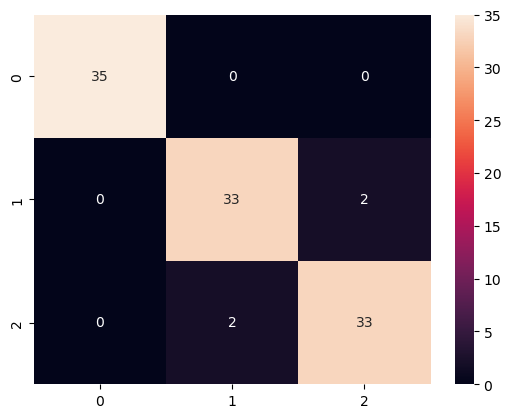

In [31]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt='g')
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



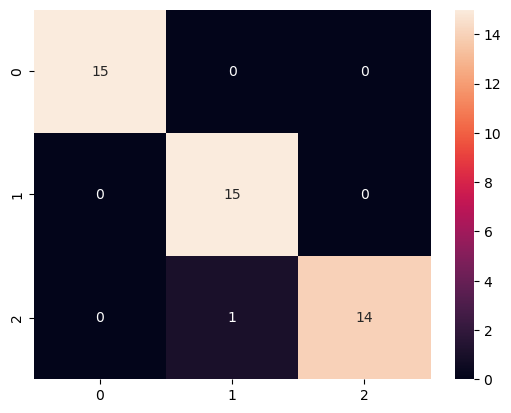

In [32]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,fmt='g')
print(classification_report(y_test,y_test_predict))

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_predict_test = decision_tree.predict(x_test)
y_predict_train = decision_tree.predict(x_train)

In [34]:
print('Decision Tree')
print(classification_report(y_train,y_predict_train))

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [35]:
print("Decision Tree")
print(classification_report(y_test, y_predict_test))

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

y_predict_test = random_forest.predict(x_test)
y_predict_train = random_forest.predict(x_train)

In [37]:
# Random Forest
print("Random Forest Model")
print(classification_report(y_train, y_predict_train))

Random Forest Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [38]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Feature Importance

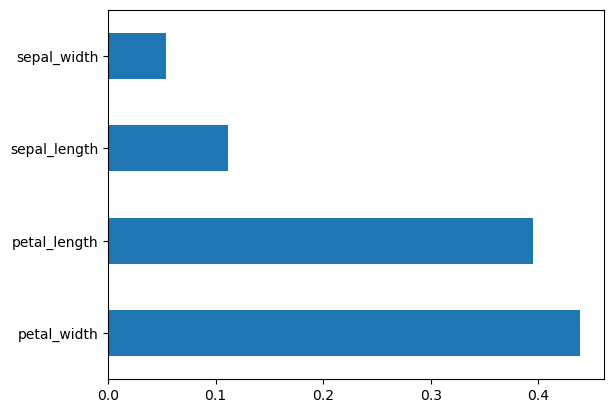

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()


# Results

In [40]:
Results = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],'Train Score':[0.96,1.00,1.00],
                        'Test Score':[0.98,0.98,0.98]})
Results_show = Results.sort_values(['Train Score','Test Score'],
                                   ascending=[False,False])
Results_show = Results.set_index('Model')
Results_show

,Train Score,Test Score
Model,,
Logistic Regression,0.96,0.98
Decision Tree,1.00,0.98
Random Forest,1.00,0.98


Text(0.5, 1.0, 'Test Score Count Plot')

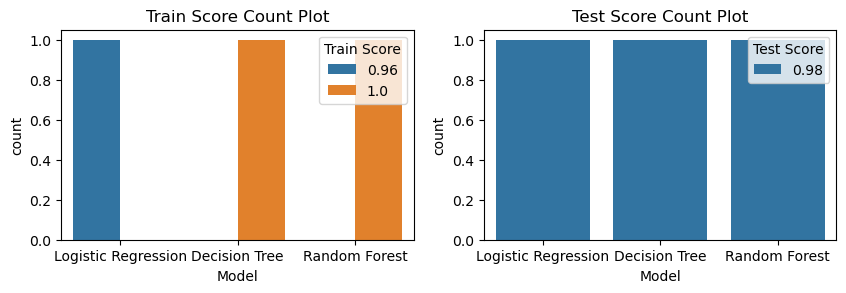

In [41]:
# Create a dataframe with the performance metrics
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Train Score': [0.96,1.00,1.00],
    'Test Score': [0.98,0.98,0.98]
}

df = pd.DataFrame(data)

# Plotting count plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Model', hue='Train Score')
plt.title('Train Score Count Plot')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Model', hue='Test Score')
plt.title('Test Score Count Plot')